# **Measuring how Supply & Demand are going** (01-01-2001 to 03-01-2025)

## Demand

#### 🔴 **Labor Demand Indicators**

These reflect how many workers employers are trying to hire:

* **Job Openings (JOLTS: JTSJOL)** – Pure demand signal.
* **Hires (JTSHIR)** – Flow of successful hiring.
* **Quits (JTSQUR)** – Indicates confidence in re-employment (tight market).

In [174]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Job_Openings_Rate_df = pd.read_csv('Job_Openings_Rate.csv')
Hires_Rate_df = pd.read_csv('Hires_Rate.csv')
Quits_Rate_df = pd.read_csv('Quits_Rate.csv')

# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Load DataFrames into the database as tables
Job_Openings_Rate_df.to_sql('Openings', conn, index=False, if_exists='replace')
Quits_Rate_df.to_sql('Quits', conn, index=False, if_exists='replace')
Hires_Rate_df.to_sql('Hires', conn, index=False, if_exists='replace')



# SQL query to merge all tables on 'Player'
sql_query = """
SELECT 
    Quits.observation_date, 
    Job_Openings_Rate,
    Hires_Rate,
    Quits_Rate
FROM Quits
INNER JOIN Openings ON Quits.observation_date = Openings.observation_date
INNER JOIN Hires ON Quits.observation_date = Hires.observation_date

"""


# Execute the query and load results into a DataFrame
Demand_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
# csv_filename = "Stats/All_Player_Numbers.csv"
# Player_Numbers_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the file to the user


Demand_df

,observation_date,Job_Openings_Rate,Hires_Rate,Quits_Rate
0,2000-12-01,5426,5088,2882
1,2001-01-01,5722,5234,3245
2,2001-02-01,5303,5097,3053
3,2001-03-01,5528,4762,3054
4,2001-04-01,5204,4615,3163
...,...,...,...,...
287,2024-11-01,5307,8031,3032
288,2024-12-01,5374,7508,3095
289,2025-01-01,5371,7762,3256
290,2025-02-01,5370,7480,3250


## Supply

#### 🔵 **Labor Supply Indicators**

These show the availability and willingness of people to work:

* **Unemployment Level (UNEMPLOY)** – Total people actively seeking work.
* **Prime-Age LFPR (25–54)** – Cleanest view of core working population.
* **Not in Labor Force, Want a Job Now (NILFWJN)** – Latent supply.
* **Marginally Attached Workers** – Show potential hidden supply.
* **Involuntary Part-Time Rate** – Slack in the supply.

In [175]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Unemployment_Level_df = pd.read_csv('Unemployment_Level.csv')
Prime_LFPR_df = pd.read_csv('Prime_LFPR.csv')
NILFWJN_df = pd.read_csv('NILFWJN.csv')
Marginally_Attached_Workers_df = pd.read_csv('Marginally_Attached.csv')
Involuntary_Part_Time_df = pd.read_csv('Involuntary_Part_Time.csv')

# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Load DataFrames into the database as tables
Unemployment_Level_df.to_sql('Unemployment', conn, index=False, if_exists='replace')
Prime_LFPR_df.to_sql('LFPR', conn, index=False, if_exists='replace')
NILFWJN_df.to_sql('NILFWJN', conn, index=False, if_exists='replace')
Marginally_Attached_Workers_df.to_sql('Attached_Workers', conn, index=False, if_exists='replace')
Involuntary_Part_Time_df.to_sql('Involuntary_Part_Time', conn, index=False, if_exists='replace')




# SQL query to merge all tables on 'Player'
sql_query = """
SELECT 
    NILFWJN.observation_date, 
    Not_In_Labor_Force_WantAJobNow,
    Unemployment_Level,
    Marginally_Attached_Workers,
    Involuntary_Part_Time
FROM NILFWJN
INNER JOIN Unemployment ON NILFWJN.observation_date = Unemployment.observation_date
INNER JOIN Attached_Workers ON NILFWJN.observation_date = Attached_Workers.observation_date
INNER JOIN Involuntary_Part_Time ON NILFWJN.observation_date = Involuntary_Part_Time.observation_date


"""


# Execute the query and load results into a DataFrame
Supply_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
# csv_filename = "Stats/All_Player_Numbers.csv"
# Player_Numbers_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the file to the user


Supply_df

,observation_date,Not_In_Labor_Force_WantAJobNow,Unemployment_Level,Marginally_Attached_Workers,Involuntary_Part_Time
0,1994-01-01,6723,8630,600,4947
1,1994-02-01,6315,8583,489,4677
2,1994-03-01,6387,8470,533,4890
3,1994-04-01,6636,8331,502,4752
4,1994-05-01,6363,7915,436,4836
...,...,...,...,...,...
371,2024-12-01,5505,6886,491,4358
372,2025-01-01,5479,6849,630,4477
373,2025-02-01,5893,7052,463,4937
374,2025-03-01,5915,7083,458,4780


# DERIVED FEATURES

### 📊 **Derived Metrics to Compare Supply vs. Demand**
| Feature Name                  | Equation                                                 | Interpretation                                  | Why It Matters                                                             | Supply or Demand |
|------------------------------|-----------------------------------------------------------|--------------------------------------------------|------------------------------------------------------------------------------|------------------|
| OpeningsPerUnemployed        | Job_Openings_Rate / Unemployment_Level                   | Openings per unemployed person                  | Signals labor tightness or slack                                           | Demand           |
| OpeningsPerHire              | Job_Openings_Rate / Hires_Rate                           | Openings per hire                               | High values imply hiring friction or mismatch                              | Demand           |
| HiresPerUnemployed           | Hires_Rate / Unemployment_Level                          | Hires per unemployed person                     | Indicates efficiency of unemployed absorption                               | Demand           |
| QuitsPerUnemployed           | Quits_Rate / Unemployment_Level                          | Quits per unemployed person                     | Reflects worker confidence in finding new jobs                              | Supply           |
| LayoffsPerOpening            | Layoffs_and_Discharges / Job_Openings_Rate              | Layoffs per opening                             | High values imply instability or contradictory signals                      | Supply           |
| QuitsPerLayoffs              | Quits_Rate / Layoffs_and_Discharges                     | Voluntary vs involuntary separations            | Indicates whether workers are confident or being forced out                | Supply           |
| NILFWJNPerPop                | Not_In_Labor_Force_WantAJobNow / Total_Population       | Hidden unemployed in total population           | Captures discouraged workers not counted in official stats                 | Supply           |
| MarginallyAttachedPerNILF    | Marginally_Attached_Workers / Not_in_Labor_Force        | Share of NILF willing to work                   | Signals potential re-entry into workforce                                   | Supply           |
| CPIYOY                       | CPI.pct_change(12) * 100                                 | Year-over-year inflation                        | Tracks price pressure impacting wages and hiring                           | Demand           |
| TempHelpEmploymentYoY        | Temp_Help_Services.pct_change(12) * 100                  | YoY growth of temp jobs                         | Leading indicator of labor demand swings                                   | Demand           |
| AvgWeeklyEarningYoY          | Avg_Weekly_Earning.pct_change(12) * 100                  | Nominal earnings growth                         | High growth indicates wage pressure or labor bargaining power              | Demand           |
| RealAvgWeeklyEarningsYoY     | AvgWeeklyEarningYoY - CPIYOY                             | Real wage growth (inflation-adjusted)           | Indicates actual purchasing power of workers                                | Supply           |
| U6_U3_Spread                 | U6_Unemployment_Rate - U3_Unemployment_Rate             | Underemployment spread                          | Captures hidden slack beyond official unemployment                         | Supply           |


These are especially useful for directly assessing imbalance:



In [176]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames

Layoffs_df = pd.read_csv('Layoffs.csv')
Total_Seperations_df = pd.read_csv('Total_Seperations.csv')
Temp_Help_Employment_df = pd.read_csv('Temporary_Help_Services_Employment.csv')
Avg_Weekly_Earnings_df = pd.read_csv('Average_Weekly_Earnings.csv')
Median_Hourly_Wage_Growth_df = pd.read_csv('Median_Hourly_Wage_Growth.csv')
Total_Pop_df = pd.read_csv('Total_Population.csv')
Not_in_Labor_Force_df = pd.read_csv('Not_in_Labor_Force.csv')
U6_Unempoyment_df = pd.read_csv('U6_Unemployment_Rate.csv')
U3_Unempoyment_df = pd.read_csv('U3_Unemployment_Rate.csv')
U2_Unempoyment_df = pd.read_csv('U2_Unemployment_Rate.csv')

Unemployment_Level_df = pd.read_csv('Unemployment_Level.csv')
Prime_Employment_to_Pop_Ratio_df = pd.read_csv('Prime_Employment_to_Population_Ratio.csv')
CPI_df = pd.read_csv('CPI.csv')
Median_Weeks_Unemployed_df= pd.read_csv('Median_Weeks_Unemployed.csv')
Initial_Jobless_Claims_df = pd.read_csv('Initial_Jobless_Claims.csv')




# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Load DataFrames into the database as tables
Layoffs_df.to_sql('Layoff', conn, index=False, if_exists='replace')
Demand_df.to_sql('Demand', conn, index=False, if_exists='replace')
Supply_df.to_sql('Supply', conn, index=False, if_exists='replace')
Total_Seperations_df.to_sql('Seperation', conn, index=False, if_exists='replace')
Temp_Help_Employment_df.to_sql('Temp_Help', conn, index=False, if_exists='replace')
Avg_Weekly_Earnings_df.to_sql('Weekly_Earning', conn, index=False, if_exists='replace')
Median_Hourly_Wage_Growth_df.to_sql('Median_Wage_Growth', conn, index=False, if_exists='replace')
Total_Pop_df.to_sql('Population', conn, index=False, if_exists='replace')
Not_in_Labor_Force_df.to_sql('NILF', conn, index=False, if_exists='replace')
U6_Unempoyment_df.to_sql('U6', conn, index=False, if_exists='replace')
U3_Unempoyment_df.to_sql('U3', conn, index=False, if_exists='replace')
U2_Unempoyment_df.to_sql('U2', conn, index=False, if_exists='replace')
Unemployment_Level_df.to_sql('Unemployment_Level', conn, index=False, if_exists='replace')
Prime_Employment_to_Pop_Ratio_df.to_sql('Prime_ETPR', conn, index=False, if_exists='replace')
CPI_df.to_sql('CPI', conn, index=False, if_exists='replace')
Median_Weeks_Unemployed_df.to_sql('Median_Weeks_Unemployed', conn, index=False, if_exists='replace')
Initial_Jobless_Claims_df.to_sql('Initial_Claims', conn, index=False, if_exists='replace')



# SQL query to merge all tables on 'Player'
sql_query = """
SELECT *
FROM Layoff
JOIN Demand ON Layoff.observation_date = Demand.observation_date
JOIN Seperation ON Layoff.observation_date = Seperation.observation_date
JOIN Temp_Help ON Layoff.observation_date = Temp_Help.observation_date
JOIN Weekly_Earning ON Layoff.observation_date = Weekly_Earning.observation_date
JOIN Median_Wage_Growth ON Layoff.observation_date = Median_Wage_Growth.observation_date
JOIN Population ON Layoff.observation_date = Population.observation_date
JOIN NILF ON Layoff.observation_date = NILF.observation_date
JOIN U6 ON Layoff.observation_date = U6.observation_date
JOIN U3 ON Layoff.observation_date = U3.observation_date
JOIN U2 ON Layoff.observation_date = U2.observation_date

JOIN Supply ON Layoff.observation_date = Supply.observation_date
JOIN Prime_ETPR ON Layoff.observation_date = Prime_ETPR.observation_date
JOIN CPI ON Layoff.observation_date = CPI.observation_date
JOIN Median_Weeks_Unemployed ON Layoff.observation_date = Median_Weeks_Unemployed.observation_date
JOIN Initial_Claims ON Layoff.observation_date = Initial_Claims.observation_date


"""


# Execute the query and load results into a DataFrame
Supply_Demand_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
# csv_filename = "Stats/All_Player_Numbers.csv"
# Player_Numbers_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the file to the user

Supply_Demand_Indicators_df

,observation_date,Layoffs_and_Discharges,observation_date,Job_Openings_Rate,Hires_Rate,Quits_Rate,observation_date,Total_Seperations,observation_date,Temp_Help_Services,...,Marginally_Attached_Workers,Involuntary_Part_Time,observation_date,Prime_Employment_to_Pop_Ratio,observation_date,CPI,observation_date,MedianWeeksUnemployed,observation_date,InitialJoblessClaims
0,2000-12-01,2018,2000-12-01,5426,5088,2882,2000-12-01,5240,2000-12-01,2587.2,...,269,3243,2000-12-01,81.4,2000-12-01,174.600,2000-12-01,6.0,2000-12-01,346000.0
1,2001-01-01,2220,2001-01-01,5722,5234,3245,2001-01-01,5842,2001-01-01,2566.4,...,301,3332,2001-01-01,81.4,2001-01-01,175.600,2001-01-01,5.8,2001-01-01,340000.0
2,2001-02-01,1855,2001-02-01,5303,5097,3053,2001-02-01,5231,2001-02-01,2533.7,...,287,3296,2001-02-01,81.3,2001-02-01,176.000,2001-02-01,6.1,2001-02-01,371250.0
3,2001-03-01,2133,2001-03-01,5528,4762,3054,2001-03-01,5566,2001-03-01,2485.3,...,349,3280,2001-03-01,81.3,2001-03-01,176.100,2001-03-01,6.6,2001-03-01,387200.0
4,2001-04-01,1883,2001-04-01,5204,4615,3163,2001-04-01,5414,2001-04-01,2402.1,...,349,3289,2001-04-01,80.9,2001-04-01,176.400,2001-04-01,5.9,2001-04-01,396750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2024-11-01,1739,2024-11-01,5307,8031,3032,2024-11-01,5087,2024-11-01,2550.1,...,427,4469,2024-11-01,80.4,2024-11-01,316.449,2024-11-01,10.5,2024-11-01,219400.0
288,2024-12-01,1669,2024-12-01,5374,7508,3095,2024-12-01,5082,2024-12-01,2551.8,...,491,4358,2024-12-01,80.5,2024-12-01,317.603,2024-12-01,10.4,2024-12-01,222250.0
289,2025-01-01,1674,2025-01-01,5371,7762,3256,2025-01-01,5272,2025-01-01,2543.8,...,630,4477,2025-01-01,80.7,2025-01-01,319.086,2025-01-01,10.4,2025-01-01,213500.0
290,2025-02-01,1780,2025-02-01,5370,7480,3250,2025-02-01,5316,2025-02-01,2541.6,...,463,4937,2025-02-01,80.5,2025-02-01,319.775,2025-02-01,10.0,2025-02-01,226000.0


In [177]:
Supply_Demand_Indicators_df = Supply_Demand_Indicators_df.loc[:, ~Supply_Demand_Indicators_df.columns.duplicated()]

# Supply vs Demand Indicators
Supply_Demand_Indicators_df['OpeningsPerUnemployed']= Supply_Demand_Indicators_df['Job_Openings_Rate']/Supply_Demand_Indicators_df['Unemployment_Level']
Supply_Demand_Indicators_df['OpeningsPerHire']= Supply_Demand_Indicators_df['Job_Openings_Rate']/Supply_Demand_Indicators_df['Hires_Rate']
Supply_Demand_Indicators_df['HiresPerUnemployed']= Supply_Demand_Indicators_df['Hires_Rate']/Supply_Demand_Indicators_df['Unemployment_Level']
Supply_Demand_Indicators_df['QuitsPerUnemployed']= Supply_Demand_Indicators_df['Quits_Rate']/Supply_Demand_Indicators_df['Unemployment_Level']
Supply_Demand_Indicators_df['LayoffsPerOpening']= Supply_Demand_Indicators_df['Layoffs_and_Discharges']/Supply_Demand_Indicators_df['Job_Openings_Rate']
Supply_Demand_Indicators_df['QuitsPerLayoffs']= Supply_Demand_Indicators_df['Quits_Rate']/Supply_Demand_Indicators_df['Layoffs_and_Discharges']
Supply_Demand_Indicators_df['NILFWJNPerPop']= Supply_Demand_Indicators_df['Not_In_Labor_Force_WantAJobNow']/Supply_Demand_Indicators_df['Total_Population']
Supply_Demand_Indicators_df['MarginallyAttachedPerNILF']= Supply_Demand_Indicators_df['Marginally_Attached_Workers']/Supply_Demand_Indicators_df['Not_in_Labor_Force']


# Other Market Indicators
Supply_Demand_Indicators_df['CPIYOY']= Supply_Demand_Indicators_df['CPI'].pct_change(periods=12) * 100
Supply_Demand_Indicators_df['TempHelpEmploymentYoY']= Supply_Demand_Indicators_df['Temp_Help_Services'].pct_change(periods=12) * 100
Supply_Demand_Indicators_df['AvgWeeklyEarningYoY']= Supply_Demand_Indicators_df['Avg_Weekly_Earning'].pct_change(periods=12) * 100
Supply_Demand_Indicators_df['AvgWeeklyEarningYoY']= Supply_Demand_Indicators_df['Avg_Weekly_Earning'].pct_change(periods=12) * 100
Supply_Demand_Indicators_df['RealAvgWeeklyEarningsYoY']= Supply_Demand_Indicators_df['AvgWeeklyEarningYoY'] - Supply_Demand_Indicators_df['CPIYOY']
Supply_Demand_Indicators_df['U6_U3_Spread'] = (Supply_Demand_Indicators_df['U6_Unemployment_Rate'] - Supply_Demand_Indicators_df['U3_Unemployment_Rate'])




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [178]:
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt

Supply_Demand_Indicators_df = Supply_Demand_Indicators_df.loc[:, ~Supply_Demand_Indicators_df.columns.duplicated()]
# Standardize (z-score) each feature
Supply_Demand_Indicators_df['Unemployed_z'] = zscore(Supply_Demand_Indicators_df['Unemployment_Level'], nan_policy='omit')
Supply_Demand_Indicators_df['NILFWJN_z'] = zscore(Supply_Demand_Indicators_df['Not_In_Labor_Force_WantAJobNow'], nan_policy='omit')
Supply_Demand_Indicators_df['Marginally_Attached_z'] = zscore(Supply_Demand_Indicators_df['Marginally_Attached_Workers'], nan_policy='omit')
Supply_Demand_Indicators_df['Involuntary_Part_Time_Rate_z'] = zscore(Supply_Demand_Indicators_df['Involuntary_Part_Time'], nan_policy='omit')

Supply_Demand_Indicators_df['Job_Openings_z'] = zscore(Supply_Demand_Indicators_df['Job_Openings_Rate'], nan_policy='omit')
Supply_Demand_Indicators_df['Hires_z'] = zscore(Supply_Demand_Indicators_df['Hires_Rate'], nan_policy='omit')
Supply_Demand_Indicators_df['Quits_z'] = zscore(Supply_Demand_Indicators_df['Quits_Rate'], nan_policy='omit')


## Next steps

# 📊 **Comprehensive Labor Market Index Table**

### 🔴 **Demand-Side (Heat / Pressure)**

#### 1. 🔧 **Labor\_Tightness\_Index**

Captures how intensely employers are competing for talent. Built from openings per unemployed, hires per unemployed, and prime-age participation, it reflects a tight, high-demand environment where workers hold bargaining power.

#### 2. 💸 **Compensation\_Pressure\_Index**

Measures wage inflation and employer cost pressure. Rising values signal that employers are raising wages to attract or retain talent — a key symptom of sustained labor demand strength.

#### 3. 🔄 **Labor\_Market\_Flow\_Index**

Tracks how dynamically the market is moving — based on quits, separations, and temp hires. High churn signals demand-side confidence: firms are hiring quickly, and workers feel empowered to switch jobs.

---

### 🔵 **Supply-Side (Slack / Friction)**

#### 1. 🧠 **Labor\_Distress\_Index**

Captures the depth of worker-side weakness — including underemployment, involuntary part-time work, and marginal attachment. Complements headline unemployment by revealing hidden distress in the labor force.

#### 2. 🫥 **Latent\_Labor\_Slack\_Index**

Tracks discouraged workers not captured in traditional unemployment stats. High values show underutilized labor potential — particularly during recoveries when U3 may be low, but participation remains weak.

#### 3. 🧮 **Hiring\_Friction\_Index**

Measures how easily job openings translate into actual hires. Elevated friction indicates mismatch, skills gaps, or other inefficiencies in connecting supply to demand — especially relevant during structural transitions.

#### 4. ⏳ **Hiring\_Latency\_Index**

Estimates the time lag between job openings and hires. Uses metrics like openings-per-hire, hires-per-unemployed, and median unemployment duration to detect delays in job matching — a signal of supply-side friction or employer hesitation.

---


### **Ones We are Aiming For:**

#### 🧊 **Market Freeze Index**

* Excellent summary measure: combines all dynamics into one composite.
* Especially useful for:

  * Detecting labor market **gridlock**
  * Visualizing **policy-sensitive conditions** (e.g., monetary easing/tightening timing)
  * Building signals into broader macro models


#### ⚖️ **Market Imbalance Index**

* Clean measure of **net labor market imbalance** — demand pressure minus supply frictions.
* Especially useful for:

  * Identifying periods of **labor overheating** or **labor slack**
  * Detecting **turning points** in business cycles and wage inflation trends
  * Enhancing **macro forecasting models** and labor policy targeting (e.g., assessing mismatch or re-employment friction)


---

### 📈 Overall Strengths:

* **Balanced**: You capture both level (tightness/distress) and structural (friction/slack/flow) signals.
* **Flexible**: Each index stands on its own *or* rolls into the Frozen Market Index.
* **Explainable**: Each one is intuitive to economists and understandable to non-experts.

---

### 🚀 Suggestions (Optional Enhancements):

1. **Add Weights** (if justified) to the Frozen Market Index — e.g., weight flow less if it’s noisier.
2. **Rolling Averages** or **z-score smoothing** — to reduce volatility.
3. **Overlay Recessions** — plot indices with NBER recession bands for insight.
4. **Build Dashboards** — index snapshots + recent trends = powerful visual tools.

---

Let me know if you'd like this section turned into a polished Markdown file, slide, or dashboard-ready writeup!





### 1. **Labor Tightness Index**

| **Attribute**      | **Details**                                                                                 |
| ------------------ | ------------------------------------------------------------------------------------------- |
| **Purpose**        | Shows how eager employers are to hire and how confident workers are to quit for better jobs |
| **Components**     | Job Openings Rate, Hires Rate, Quits Rate (z-scored)                                        |
| **Formula**        | Average of `Job_Openings_z`, `Hires_z`, `Quits_z`                                           |
| **Interpretation** | Higher values = strong hiring demand and high worker confidence                             |


<Axes: >

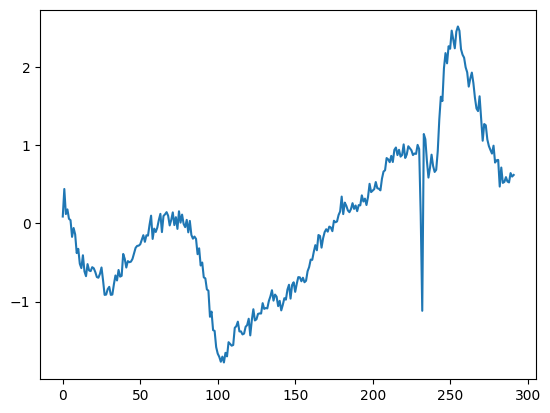

In [179]:
Supply_Demand_Indicators_df['Labor_Tightness_Index'] = Supply_Demand_Indicators_df[[
    'Job_Openings_z', 'Hires_z', 'Quits_z']].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Labor_Tightness_Index'].plot()

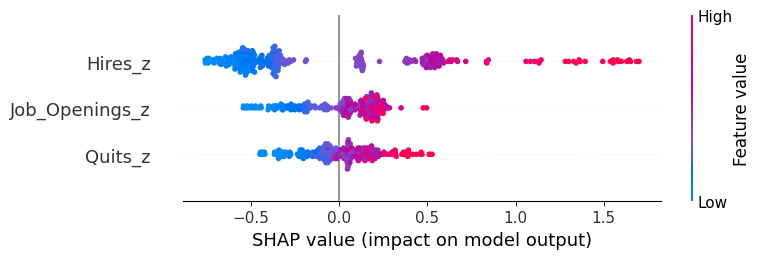

In [180]:
import pandas as pd
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
X = Supply_Demand_Indicators_df[[
    'Job_Openings_z', 'Hires_z', 'Quits_z'
]]

y = Supply_Demand_Indicators_df['Labor_Tightness_Index']

# Step 2: Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 3: Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Step 4: Plot feature importance
shap.summary_plot(shap_values, X)

### 2. **Labor Distress Index**

| **Attribute**      | **Details**                                                                                     |
| ------------------ | ----------------------------------------------------------------------------------------------- |
| **Purpose**        | Highlights how many people are struggling to find full-time or stable jobs                      |
| **Components**     | Unemployed, NILFWJN, Marginally Attached, Involuntary Part-Time (z-scored)                      |
| **Formula**        | Average of `Unemployed_z`, `NILFWJN_z`, `Marginally_Attached_z`, `Involuntary_Part_Time_Rate_z` |
| **Interpretation** | Higher values = more underemployment, slack, or discouraged workers                             |


<Axes: >

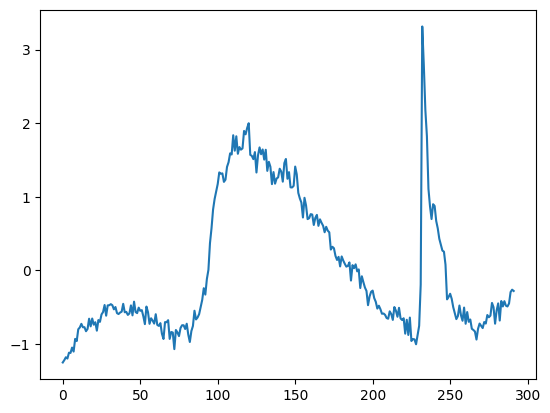

In [181]:
Supply_Demand_Indicators_df['Labor_Distress_Index'] = Supply_Demand_Indicators_df[[
    'Unemployed_z', 'NILFWJN_z', 'Marginally_Attached_z', 'Involuntary_Part_Time_Rate_z'
]].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Labor_Distress_Index'].plot()

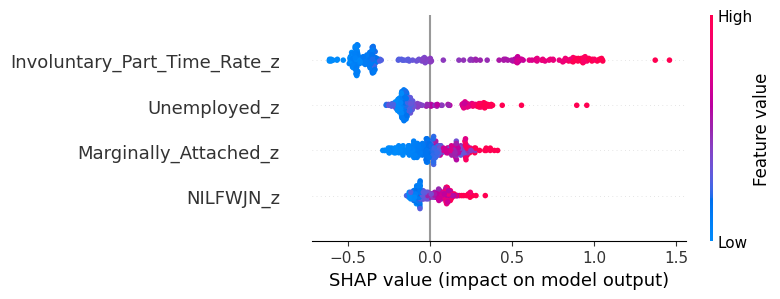

In [182]:
import pandas as pd
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
X = Supply_Demand_Indicators_df[[
    'Unemployed_z', 'NILFWJN_z', 'Marginally_Attached_z', 'Involuntary_Part_Time_Rate_z'
]]

y = Supply_Demand_Indicators_df['Labor_Distress_Index']

# Step 2: Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 3: Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Step 4: Plot feature importance
shap.summary_plot(shap_values, X)

### 3. **Hiring Friction Index**

| **Attribute**      | **Details**                                                                          |
| ------------------ | ------------------------------------------------------------------------------------ |
| **Purpose**        | Shows how hard it is for companies to actually hire workers                          |
| **Components**     | Openings per Hire, Hires per Unemployed (inverse), Layoffs per Opening (z-scored)    |
| **Formula**        | Average of `OpeningsPerHire_z`, `HiresPerUnemployed_z`, `LayoffsPerOpening_z`        |
| **Interpretation** | Higher values = jobs are staying open longer or it's harder to find the right people |


<Axes: >

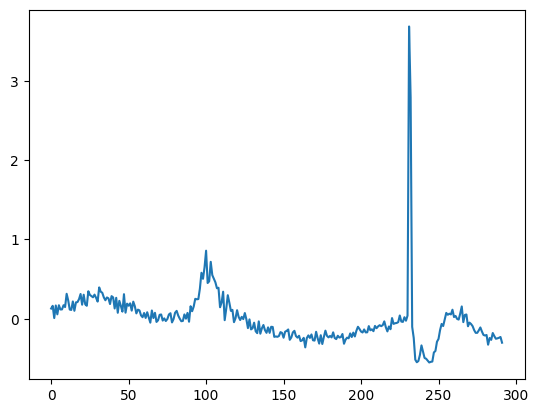

In [183]:
Supply_Demand_Indicators_df['OpeningsPerHire_z'] = zscore(Supply_Demand_Indicators_df['OpeningsPerHire'], nan_policy='omit')
Supply_Demand_Indicators_df['HiresPerUnemployed_z'] = zscore(Supply_Demand_Indicators_df['HiresPerUnemployed'], nan_policy='omit')
Supply_Demand_Indicators_df['LayoffsPerOpening_z'] = zscore(Supply_Demand_Indicators_df['LayoffsPerOpening'], nan_policy='omit')

Supply_Demand_Indicators_df['Hiring_Friction_Index'] = Supply_Demand_Indicators_df[[
    'OpeningsPerHire_z', 'HiresPerUnemployed_z', 'LayoffsPerOpening_z'
]].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Hiring_Friction_Index'].plot()

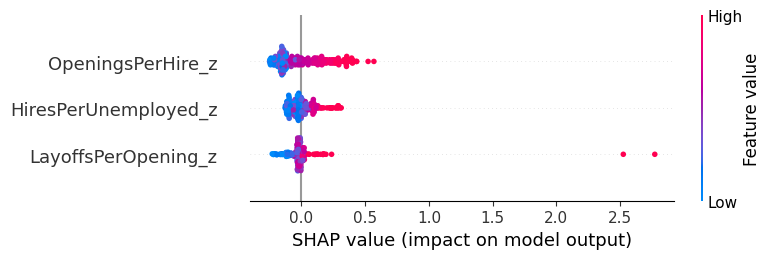

In [184]:
import pandas as pd
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
X = Supply_Demand_Indicators_df[[
    'OpeningsPerHire_z', 'HiresPerUnemployed_z', 'LayoffsPerOpening_z'

]]

y = Supply_Demand_Indicators_df['Hiring_Friction_Index']

# Step 2: Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Drop rows with any NaNs in X or y
data = pd.concat([X, y], axis=1).dropna()
X_clean = data[X.columns]
y_clean = data[y.name]

model.fit(X_clean, y_clean)



# Step 3: Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_clean)

# Step 4: Plot feature importance
shap.summary_plot(shap_values, X_clean)

### 4. **Hiring Latency Index**

| **Attribute**      | **Details**                                                                                                                                       |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Purpose**        | Measures **how long it takes** for job openings to turn into hires — a proxy for hiring delay or responsiveness in the labor market               |
| **Components**     | Openings per Hire (z-scored), Hires per Unemployed (inverse z-score), Median Weeks Unemployed (z-scored)                                          |
| **Formula**        | `+ OpeningsPerHire_z`<br>`– HiresPerUnemployed_z`<br>`+ MedianWeeksUnemployed_z`                                                                  |
| **Interpretation** | Higher values = **longer hiring times** — employers take longer to fill jobs, job seekers wait longer for offers, and hiring pipelines are slower |

<Axes: >

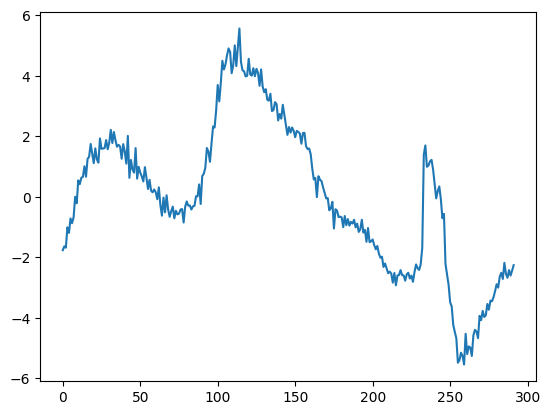

In [185]:
Supply_Demand_Indicators_df['MedianWeeksUnemployed_z'] = zscore(Supply_Demand_Indicators_df['MedianWeeksUnemployed'], nan_policy='omit')
Supply_Demand_Indicators_df['OpeningsPerHire_z'] = zscore(Supply_Demand_Indicators_df['OpeningsPerHire'], nan_policy='omit')

Supply_Demand_Indicators_df['Hiring_Latency_Index'] = (
    + Supply_Demand_Indicators_df['OpeningsPerHire_z']
    - Supply_Demand_Indicators_df['HiresPerUnemployed_z']
    + Supply_Demand_Indicators_df['MedianWeeksUnemployed_z']
)

Supply_Demand_Indicators_df['Hiring_Latency_Index'].plot()


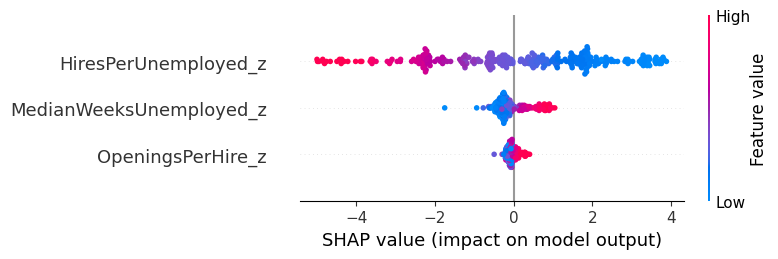

In [186]:
import pandas as pd
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
X = Supply_Demand_Indicators_df[[
    'OpeningsPerHire_z', 'HiresPerUnemployed_z', 'MedianWeeksUnemployed_z'

]]

y = Supply_Demand_Indicators_df['Hiring_Latency_Index']

# Step 2: Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Drop rows with any NaNs in X or y
data = pd.concat([X, y], axis=1).dropna()
X_clean = data[X.columns]
y_clean = data[y.name]

model.fit(X_clean, y_clean)



# Step 3: Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_clean)

# Step 4: Plot feature importance
shap.summary_plot(shap_values, X_clean)

### 5. **Compensation Pressure Index**

| **Attribute**      | **Details**                                                                                                    |
| ------------------ | -------------------------------------------------------------------------------------------------------------- |
| **Purpose**        | Shows whether employers are feeling pressure to raise pay due to a tight labor market                          |
| **Components**     | Avg Weekly Earnings, Real Weekly Earnings YoY, Median Hourly Wage Growth, Prime-Age EPOP (z-scored)            |
| **Formula**        | Average of `Avg_Weekly_Earning_z`, `RealAvgWeeklyEarningsYoY_z`, `MedianHourlyWageGrowth3MMA_z`, `PrimeETPR_z` |
| **Interpretation** | Higher values = rising wages and tighter labor costs for employers                                             |


<Axes: >

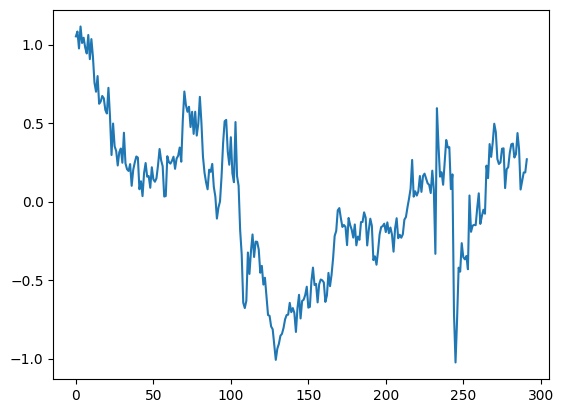

In [187]:
Supply_Demand_Indicators_df['Avg_Weekly_Earning_z'] = zscore(Supply_Demand_Indicators_df['OpeningsPerHire'], nan_policy='omit')
Supply_Demand_Indicators_df['RealAvgWeeklyEarningsYoY_z'] = zscore(Supply_Demand_Indicators_df['RealAvgWeeklyEarningsYoY'], nan_policy='omit')
Supply_Demand_Indicators_df['MedianHourlyWageGrowth3MMA_z'] = zscore(Supply_Demand_Indicators_df['Median_Hourly_Wage_Growth'], nan_policy='omit')
Supply_Demand_Indicators_df['PrimeETPR_z'] = zscore(Supply_Demand_Indicators_df['Prime_Employment_to_Pop_Ratio'], nan_policy='omit')

Supply_Demand_Indicators_df['Compensation_Pressure_Index'] = Supply_Demand_Indicators_df[[
    'Avg_Weekly_Earning_z', 'RealAvgWeeklyEarningsYoY_z', 'MedianHourlyWageGrowth3MMA_z', 'PrimeETPR_z'
]].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Compensation_Pressure_Index'].plot()

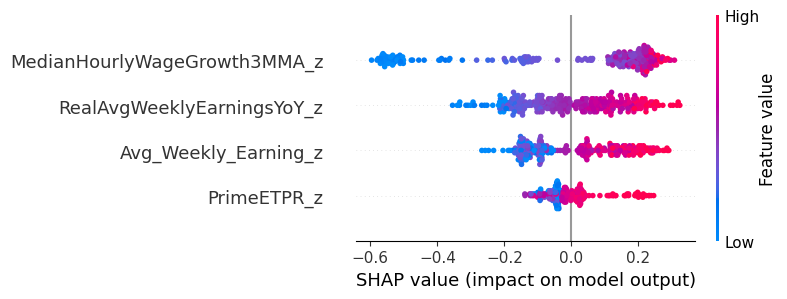

In [188]:
import pandas as pd
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
X = Supply_Demand_Indicators_df[[
    'Avg_Weekly_Earning_z', 'RealAvgWeeklyEarningsYoY_z', 'MedianHourlyWageGrowth3MMA_z', 'PrimeETPR_z'

]]

y = Supply_Demand_Indicators_df['Compensation_Pressure_Index']

# Step 2: Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Drop rows with any NaNs in X or y
data = pd.concat([X, y], axis=1).dropna()
X_clean = data[X.columns]
y_clean = data[y.name]

model.fit(X_clean, y_clean)



# Step 3: Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_clean)

# Step 4: Plot feature importance
shap.summary_plot(shap_values, X_clean)

### 6. **Labor Market Flow Index**

| **Attribute**      | **Details**                                                                                    |
| ------------------ | ---------------------------------------------------------------------------------------------- |
| **Purpose**        | Captures how much people are switching jobs or being hired/fired                               |
| **Components**     | Quits Rate, Quits-to-Layoffs Ratio, Total Separations, Temp Help Employment YoY (z-scored)     |
| **Formula**        | Average of `QuitsRate_z`, `QuitsPerLayoffs_z`, `TotalSeperations_z`, `TempHelpEmploymentYoY_z` |
| **Interpretation** | Higher values = high job movement, worker confidence, and a busy labor market                  |


<Axes: >

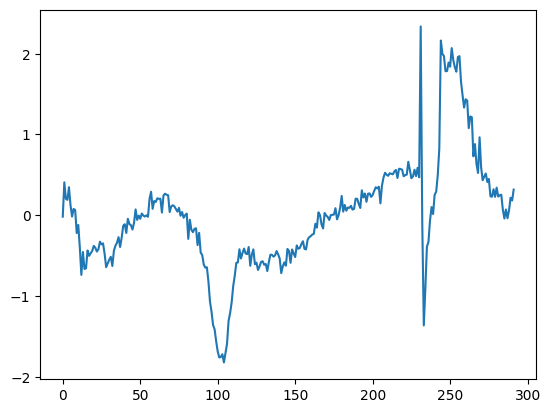

In [189]:
Supply_Demand_Indicators_df['QuitsRate_z'] = zscore(Supply_Demand_Indicators_df['Quits_Rate'], nan_policy='omit')
Supply_Demand_Indicators_df['QuitsPerLayoffs_z'] = zscore(Supply_Demand_Indicators_df['QuitsPerLayoffs'], nan_policy='omit')
Supply_Demand_Indicators_df['TotalSeperations_z'] = zscore(Supply_Demand_Indicators_df['Total_Seperations'], nan_policy='omit')
Supply_Demand_Indicators_df['TempHelpEmploymentYoY_z'] = zscore(Supply_Demand_Indicators_df['TempHelpEmploymentYoY'], nan_policy='omit')

Supply_Demand_Indicators_df['Labor_Market_Flow_Index'] = Supply_Demand_Indicators_df[[
    'QuitsRate_z', 'QuitsPerLayoffs_z', 'TotalSeperations_z', 'TempHelpEmploymentYoY_z'
]].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Labor_Market_Flow_Index'].plot()

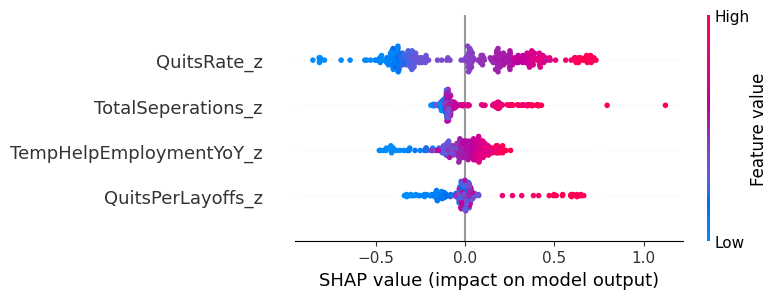

In [190]:
import pandas as pd
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
X = Supply_Demand_Indicators_df[[
    'QuitsRate_z', 'QuitsPerLayoffs_z', 'TotalSeperations_z', 'TempHelpEmploymentYoY_z'
]]

y = Supply_Demand_Indicators_df['Labor_Market_Flow_Index']

# Step 2: Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Drop rows with any NaNs in X or y
data = pd.concat([X, y], axis=1).dropna()
X_clean = data[X.columns]
y_clean = data[y.name]

model.fit(X_clean, y_clean)



# Step 3: Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_clean)

# Step 4: Plot feature importance
shap.summary_plot(shap_values, X_clean)


### 7. **Latent Labor Slack Index**

| **Attribute**      | **Details**                                                                                              |
| ------------------ | -------------------------------------------------------------------------------------------------------- |
| **Purpose**        | Shows how much hidden or overlooked labor force is out there (people who want jobs but aren’t counted)   |
| **Components**     | NILFWJN / Pop, Marginally Attached / NILF, Involuntary Part-Time, U6–U3 Spread (z-scored)                |
| **Formula**        | Average of `NILFWJNPerPop_z`, `MarginallyAttachedPerNILF_z`, `Involuntary_Part_Time_z`, `U6_U3_Spread_z` |
| **Interpretation** | Higher values = more hidden slack in the labor market not seen in official unemployment numbers          |


<Axes: >

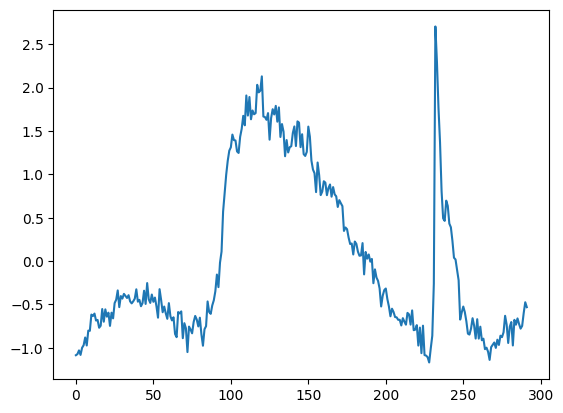

In [191]:
Supply_Demand_Indicators_df['NILFWJNPerPop_z'] = zscore(Supply_Demand_Indicators_df['NILFWJNPerPop'], nan_policy='omit')
Supply_Demand_Indicators_df['MarginallyAttachedPerNILF_z'] = zscore(Supply_Demand_Indicators_df['MarginallyAttachedPerNILF'], nan_policy='omit')
Supply_Demand_Indicators_df['Involuntary_Part_Time_z'] = zscore(Supply_Demand_Indicators_df['Involuntary_Part_Time'], nan_policy='omit')
Supply_Demand_Indicators_df['U6_U3_Spread_z'] = zscore(Supply_Demand_Indicators_df['U6_U3_Spread'], nan_policy='omit')

Supply_Demand_Indicators_df['Latent_Labor_Slack_Index'] = Supply_Demand_Indicators_df[[
    'NILFWJNPerPop_z', 'MarginallyAttachedPerNILF_z', 'Involuntary_Part_Time_z', 'U6_U3_Spread_z'
]].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Latent_Labor_Slack_Index'].plot()

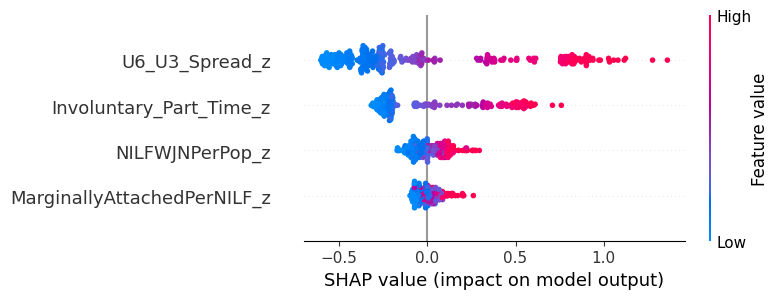

In [192]:
import pandas as pd
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
X = Supply_Demand_Indicators_df[[
    'NILFWJNPerPop_z', 'MarginallyAttachedPerNILF_z', 'Involuntary_Part_Time_z', 'U6_U3_Spread_z'
]]

y = Supply_Demand_Indicators_df['Latent_Labor_Slack_Index']

# Step 2: Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 3: Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Step 4: Plot feature importance
shap.summary_plot(shap_values, X)


# **Frozen Market Index** &/or **Supply-Demand Index**

### 1. **Market Freeze Index**
| **Attribute**      | **Details**                                                                                                                                                                                                         |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Purpose**        | Captures the **overall stress or "freeze"** in the labor market by combining signals of slack, weak demand, and low mobility                                                                                        |
| **Components**     | Labor Distress Index, Labor Tightness Index, Demand-Supply Gap Index, Hiring Friction Index, Compensation Pressure Index, Labor Market Flow Index, Latent Labor Slack Index                                         |
| **Formula**        | `+ Labor_Distress_Index`<br>`– Labor_Tightness_Index`<br>`– Demand_Supply_Gap_Index`<br>`+ Hiring_Friction_Index`<br>`+ Hiring_Latency_Index`<br>`– Compensation_Pressure_Index`<br>`– Labor_Market_Flow_Index`<br>`+ Latent_Labor_Slack_Index` |
| **Interpretation** | Higher values = labor market is "frozen": jobs are hard to fill, wages aren't rising, workers aren't moving, and hidden slack is growing                                                                            |


<Axes: title={'center': 'Market Freeze Index (Z-Scored)'}>

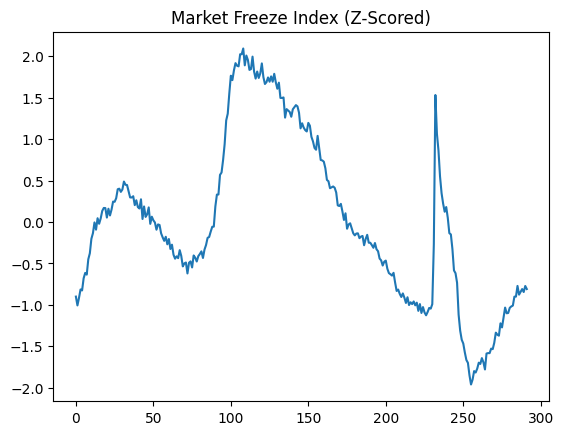

In [193]:
from scipy.stats import zscore

Supply_Demand_Indicators_df['Market_Freeze_Index'] = (
    + Supply_Demand_Indicators_df['Labor_Distress_Index']
    - Supply_Demand_Indicators_df['Labor_Tightness_Index']
    + Supply_Demand_Indicators_df['Hiring_Friction_Index']
    + Supply_Demand_Indicators_df['Hiring_Latency_Index']
    - Supply_Demand_Indicators_df['Compensation_Pressure_Index']
    - Supply_Demand_Indicators_df['Labor_Market_Flow_Index']
    + Supply_Demand_Indicators_df['Latent_Labor_Slack_Index']
)

# Optionally z-score the result if you want standardized output
Supply_Demand_Indicators_df['Market_Freeze_Index_z'] = zscore(
    Supply_Demand_Indicators_df['Market_Freeze_Index'], nan_policy='omit'
)

# Plot it
Supply_Demand_Indicators_df['Market_Freeze_Index_z'].plot(title='Market Freeze Index (Z-Scored)')


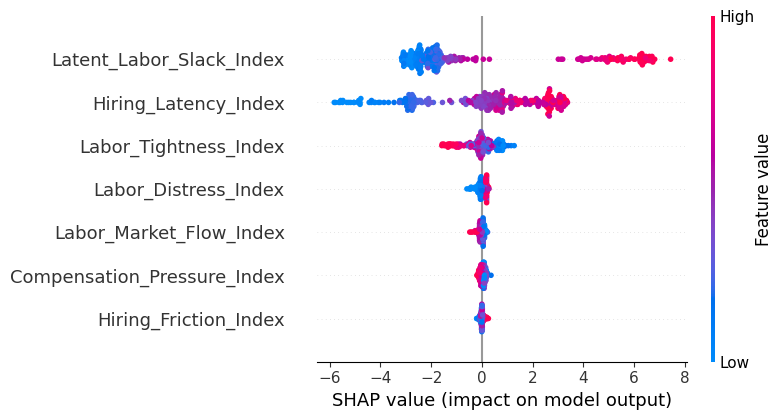

In [194]:
import pandas as pd
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
X = Supply_Demand_Indicators_df[[
    'Labor_Distress_Index',
    'Labor_Tightness_Index',
    'Hiring_Friction_Index',
    'Hiring_Latency_Index',
    'Compensation_Pressure_Index',
    'Labor_Market_Flow_Index',
    'Latent_Labor_Slack_Index'
]]

y = Supply_Demand_Indicators_df['Market_Freeze_Index']

# Step 2: Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 3: Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Step 4: Plot feature importance
shap.summary_plot(shap_values, X)


### 2. **Market Imbalance Index**

| **Attribute**      | **Details**                                                                                                                                                                                                      |
| ------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Purpose**        | Quantifies the **net imbalance between employer demand and labor supply slack**, offering a cleaner alternative to the original gap metric                                                                       |
| **Components**     | Combines the Demand Index and Supply Friction Index above                                                                                                                                                        |
| **Formula**        | `+ Labor_Tightness_Index`<br>`+ Compensation_Pressure_Index`<br>`+ Labor_Market_Flow_Index`<br>`– Labor_Distress_Index`<br>`– Latent_Labor_Slack_Index`<br>`– Hiring_Friction_Index`<br>`– Hiring_Latency_Index` |
| **Interpretation** | Higher values = **tight labor conditions** with strong demand and minimal friction/slack; lower values suggest growing mismatch, drag, or recessionary conditions                                                |


<Axes: title={'center': 'Market Imbalance Index (Z-Scored)'}>

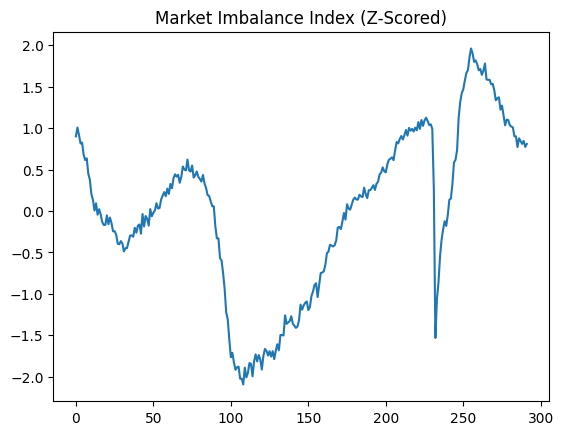

In [195]:
from scipy.stats import zscore

Supply_Demand_Indicators_df['Market_Imbalance_Index'] = (
    Supply_Demand_Indicators_df['Labor_Tightness_Index'] +
    Supply_Demand_Indicators_df['Compensation_Pressure_Index'] +
    Supply_Demand_Indicators_df['Labor_Market_Flow_Index']
    -
    Supply_Demand_Indicators_df['Labor_Distress_Index'] -
    Supply_Demand_Indicators_df['Latent_Labor_Slack_Index'] -
    Supply_Demand_Indicators_df['Hiring_Friction_Index'] -
    Supply_Demand_Indicators_df['Hiring_Latency_Index']
)

# Optionally z-score the result if you want standardized output
Supply_Demand_Indicators_df['Market_Imbalance_Index_z'] = zscore(
    Supply_Demand_Indicators_df['Market_Imbalance_Index'], nan_policy='omit'
)

# Plot it
Supply_Demand_Indicators_df['Market_Imbalance_Index_z'].plot(title='Market Imbalance Index (Z-Scored)')

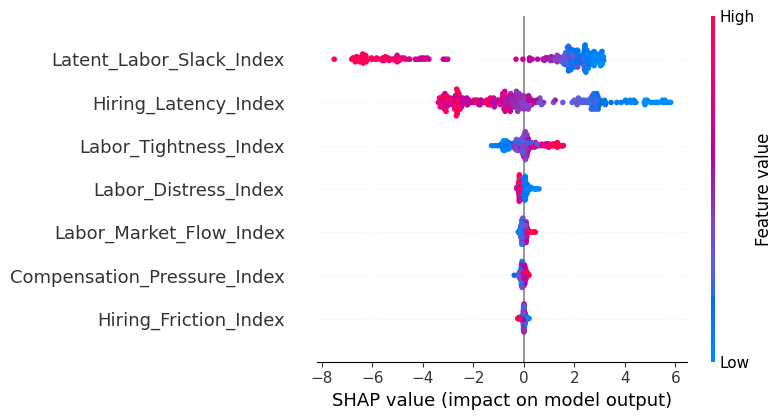

In [196]:
import pandas as pd
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
X = Supply_Demand_Indicators_df[[
   'Labor_Distress_Index',
    'Labor_Tightness_Index',
    'Hiring_Friction_Index',
    'Hiring_Latency_Index',
    'Compensation_Pressure_Index',
    'Labor_Market_Flow_Index',
    'Latent_Labor_Slack_Index'
]]

y = Supply_Demand_Indicators_df['Market_Imbalance_Index']

# Step 2: Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 3: Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Step 4: Plot feature importance
shap.summary_plot(shap_values, X)


# **COMPARING THE TWO**

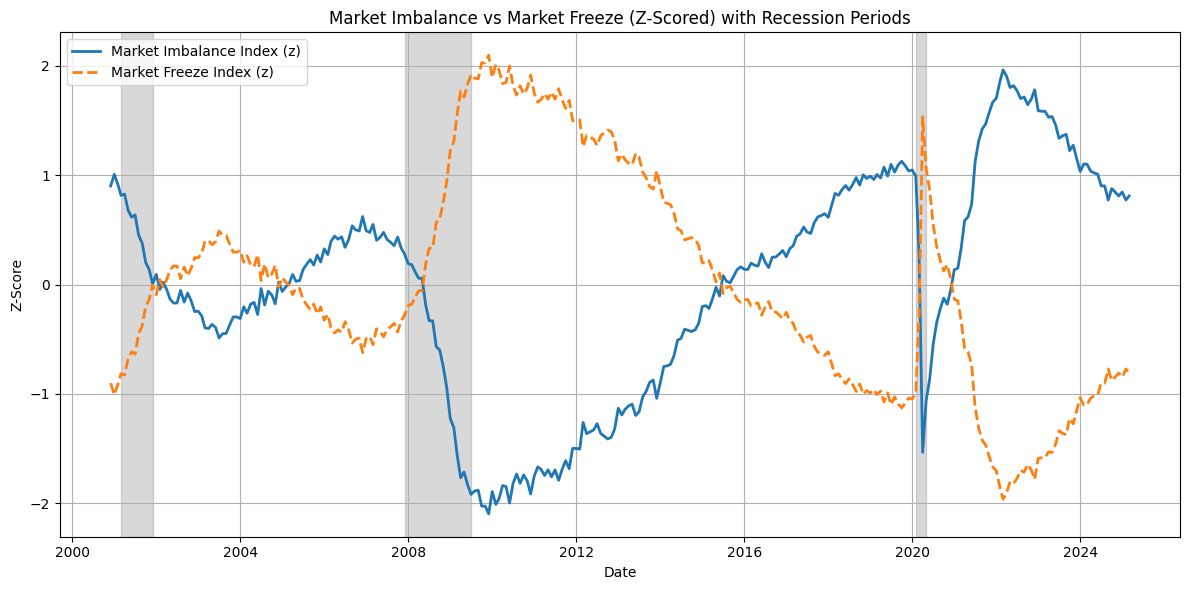

In [198]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data (assuming previously available in notebook context)

# Ensure the 'observation_date' column is in datetime format
Supply_Demand_Indicators_df['observation_date'] = pd.to_datetime(Supply_Demand_Indicators_df['observation_date'])

# Define known U.S. recession periods (NBER)
recession_periods = [
    ('2001-03-01', '2001-11-30'),
    ('2007-12-01', '2009-06-30'),
    ('2020-02-01', '2020-04-30'),
]

# Plot both indices with recession shading
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(Supply_Demand_Indicators_df['observation_date'], Supply_Demand_Indicators_df['Market_Imbalance_Index_z'], label='Market Imbalance Index (z)', linewidth=2)
ax.plot(Supply_Demand_Indicators_df['observation_date'], Supply_Demand_Indicators_df['Market_Freeze_Index_z'], label='Market Freeze Index (z)', linewidth=2, linestyle='--')

# Highlight recession periods
for start, end in recession_periods:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.3)

# Formatting
ax.set_title('Market Imbalance vs Market Freeze (Z-Scored) with Recession Periods')
ax.set_xlabel('Date')
ax.set_ylabel('Z-Score')
ax.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Seperating the Columns

To organize your dataset for **analysis or modeling**, you should group columns into **logical subsets** based on what they measure. Here's a suggested breakdown into **separate data sets**:

---

### 📅 **Core Time and Identifiers**

These are necessary for merging or time-series work:

* `observation_date`

---

### 🔴 **Raw Labor Market Activity (Level Data)**

These reflect fundamental supply/demand activity:

* `Layoffs_and_Discharges`
* `Job_Openings_Rate`
* `Hires_Rate`
* `Quits_Rate`
* `Total_Seperations`
* `Temp_Help_Services`
* `Unemployment_Level`
* `Not_in_Labor_Force`
* `Not_In_Labor_Force_WantAJobNow`
* `Marginally_Attached_Workers`
* `Involuntary_Part_Time`
* `MedianWeeksUnemployed`
* `InitialJoblessClaims`
* `Prime_Employment_to_Pop_Ratio`
* `Total_Population`

---

### 💰 **Compensation & Price Data**

Wage trends and inflation:

* `Avg_Weekly_Earning`
* `Median_Hourly_Wage_Growth`
* `CPI`

---

### 📊 **Unemployment Metrics**

Official and broader measures:

* `U3_Unemployment_Rate`
* `U6_Unemployment_Rate`
* `U2_Unemployment_Rate`

---

### 🔧 **Derived Ratios (Flow & Pressure Indicators)**

These reflect calculated labor dynamics:

* `OpeningsPerUnemployed`
* `OpeningsPerHire`
* `HiresPerUnemployed`
* `QuitsPerUnemployed`
* `LayoffsPerOpening`
* `QuitsPerLayoffs`
* `NILFWJNPerPop`
* `MarginallyAttachedPerNILF`
* `U6_U3_Spread`

---

### 📈 **Year-over-Year Change Indicators**

Useful for trend or leading signal detection:

* `CPIYOY`
* `TempHelpEmploymentYoY`
* `AvgWeeklyEarningYoY`
* `RealAvgWeeklyEarningsYoY`

---

### 🧮 **Z-Scored Variables (Standardized)**

These are the normalized versions of other columns:

* `Unemployed_z`
* `NILFWJN_z`
* `Marginally_Attached_z`
* `Involuntary_Part_Time_Rate_z`
* `Job_Openings_z`
* `Hires_z`
* `Quits_z`
* `OpeningsPerHire_z`
* `HiresPerUnemployed_z`
* `LayoffsPerOpening_z`
* `MedianWeeksUnemployed_z`
* `Avg_Weekly_Earning_z`
* `RealAvgWeeklyEarningsYoY_z`
* `MedianHourlyWageGrowth3MMA_z`
* `PrimeETPR_z`
* `QuitsRate_z`
* `QuitsPerLayoffs_z`
* `TotalSeperations_z`
* `TempHelpEmploymentYoY_z`
* `NILFWJNPerPop_z`
* `MarginallyAttachedPerNILF_z`
* `Involuntary_Part_Time_z`
* `U6_U3_Spread_z`

---

### 📊 **Composite Indices**

These are high-level aggregates:

* `Labor_Tightness_Index`
* `Labor_Distress_Index`
* `Hiring_Friction_Index`
* `Hiring_Latency_Index`
* `Compensation_Pressure_Index`
* `Labor_Market_Flow_Index`
* `Latent_Labor_Slack_Index`
* `Frozen_Market_Index`
* `Frozen_Market_Index_z`
* `Supply_Demand_Index`
* `Supply_Demand_Gap_Index`
* `Supply_Demand_Gap_Index_z`


In [ ]:
### 📦 1. **Core Labor Market Activity**

labor_activity_df = Supply_Demand_Indicators_df[[
    'observation_date',
    'Layoffs_and_Discharges',
    'Job_Openings_Rate',
    'Hires_Rate',
    'Quits_Rate',
    'Total_Seperations',
    'Temp_Help_Services',
    'Unemployment_Level',
    'Not_in_Labor_Force',
    'Not_In_Labor_Force_WantAJobNow',
    'Marginally_Attached_Workers',
    'Involuntary_Part_Time',
    'MedianWeeksUnemployed',
    'InitialJoblessClaims',
    'Prime_Employment_to_Pop_Ratio',
    'Total_Population'
]]

### 💰 2. **Compensation & Price Metrics**

wage_price_df = Supply_Demand_Indicators_df[[
    'observation_date',
    'Avg_Weekly_Earning',
    'Median_Hourly_Wage_Growth',
    'CPI'
]]

### 📊 3. **Unemployment Rates**


unemployment_df = Supply_Demand_Indicators_df[[
    'observation_date',
    'U3_Unemployment_Rate',
    'U6_Unemployment_Rate',
    'U2_Unemployment_Rate'
]]

### 🔧 4. **Derived Flow Ratios**


derived_ratios_df = Supply_Demand_Indicators_df[[
    'observation_date',
    'OpeningsPerUnemployed',
    'OpeningsPerHire',
    'HiresPerUnemployed',
    'QuitsPerUnemployed',
    'LayoffsPerOpening',
    'QuitsPerLayoffs',
    'NILFWJNPerPop',
    'MarginallyAttachedPerNILF',
    'U6_U3_Spread'
]]

### 📈 5. **YoY Change Metrics**


yoy_metrics_df = Supply_Demand_Indicators_df[[
    'observation_date',
    'CPIYOY',
    'TempHelpEmploymentYoY',
    'AvgWeeklyEarningYoY',
    'RealAvgWeeklyEarningsYoY'
]]

### 🧮 6. **Z-Scored (Standardized) Variables**


z_scores_df = Supply_Demand_Indicators_df[[
    'observation_date',
    'Unemployed_z',
    'NILFWJN_z',
    'Marginally_Attached_z',
    'Involuntary_Part_Time_Rate_z',
    'Job_Openings_z',
    'Hires_z',
    'Quits_z',
    'OpeningsPerHire_z',
    'HiresPerUnemployed_z',
    'LayoffsPerOpening_z',
    'MedianWeeksUnemployed_z',
    'Avg_Weekly_Earning_z',
    'RealAvgWeeklyEarningsYoY_z',
    'MedianHourlyWageGrowth3MMA_z',
    'PrimeETPR_z',
    'QuitsRate_z',
    'QuitsPerLayoffs_z',
    'TotalSeperations_z',
    'TempHelpEmploymentYoY_z',
    'NILFWJNPerPop_z',
    'MarginallyAttachedPerNILF_z',
    'Involuntary_Part_Time_z',
    'U6_U3_Spread_z'
]]

### 📊 7. **Composite Indices**


Composite_Indices_df = Supply_Demand_Indicators_df[[
    'observation_date',
    'Labor_Tightness_Index',
    'Labor_Distress_Index',
    'Hiring_Friction_Index',
    'Hiring_Latency_Index',
    'Compensation_Pressure_Index',
    'Labor_Market_Flow_Index',
    'Latent_Labor_Slack_Index',
    'Frozen_Market_Index',
    'Frozen_Market_Index_z',
    'Supply_Demand_Gap_Index',
    'Supply_Demand_Gap_Index_z'
]]



In [ ]:
Composite_Indices_df

,observation_date,Labor_Tightness_Index,Labor_Distress_Index,Hiring_Friction_Index,Hiring_Latency_Index,Compensation_Pressure_Index,Labor_Market_Flow_Index,Latent_Labor_Slack_Index,Frozen_Market_Index,Frozen_Market_Index_z,Supply_Demand_Gap_Index,Supply_Demand_Gap_Index_z
0,2000-12-01,0.086623,-1.255203,0.129325,-1.770496,1.051711,-0.017347,-1.085006,-5.102367,-0.900489,5.102367,0.900489
1,2001-01-01,0.438535,-1.223073,0.163531,-1.644586,1.082871,0.407861,-1.072181,-5.705576,-1.007174,5.705576,1.007174
2,2001-02-01,0.117608,-1.183881,0.009433,-1.688885,0.974870,0.203212,-1.029495,-5.188518,-0.915726,5.188518,0.915726
3,2001-03-01,0.177782,-1.201707,0.167520,-1.016546,1.114872,0.191139,-1.081527,-4.616054,-0.814478,4.616054,0.814478
4,2001-04-01,0.057379,-1.122465,0.055865,-1.200055,1.009495,0.347012,-0.999087,-4.679628,-0.825722,4.679628,0.825722
...,...,...,...,...,...,...,...,...,...,...,...,...
287,2024-11-01,0.533314,-0.493260,-0.251542,-2.683635,0.076604,-0.037027,-0.778690,-4.780017,-0.843477,4.780017,0.843477
288,2024-12-01,0.522530,-0.452707,-0.246735,-2.429416,0.130287,0.059267,-0.747294,-4.588236,-0.809558,4.588236,0.809558
289,2025-01-01,0.641462,-0.297675,-0.239905,-2.610014,0.184809,0.217291,-0.598991,-4.790147,-0.845268,4.790147,0.845268
290,2025-02-01,0.597047,-0.264829,-0.229140,-2.444564,0.185236,0.182640,-0.474487,-4.377944,-0.772365,4.377944,0.772365
